In [73]:
#https://www.linkedin.com/pulse/text-classification-using-bag-words-approach-nltk-scikit-rajendran/
#https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
#https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from sklearn.utils import shuffle

In [74]:
dev = pd.read_csv('development.csv')
eva = pd.read_csv('evaluation.csv')

In [75]:
import re
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.snowball import ItalianStemmer
from nltk.stem import WordNetLemmatizer

def CleanSentence(sentence):
    sentence = sentence.lower()
    #Remove Special characters
    sentence = re.sub("`!@#$%^&*()_+-\{}|;'':,./<>?", "", sentence)
    #Remove digits
    sentence = re.sub("(\\d|\\W)+", " ", sentence)
    #Remove single characters
    sentence = re.sub(r"\b[a-z]\b", "", sentence)
    #https://www.datacamp.com/community/tutorials/stemming-lemmatization-python
    stemmer=SnowballStemmer("italian")
    sentence = stemmer.stem(sentence)
    return sentence

def CleanText(text):
    sentences = []
    for row in text:
        sentences.append(CleanSentence(row))
    
    elements = 50
    freq = pd.Series(' '.join(text).split()).value_counts()[:elements]
    not_freq = pd.Series(' '.join(text).split()).value_counts()[-elements:]
    #Remove elements
    return sentences

In [76]:
dev['clean'] = CleanText(dev['text'])
eva['clean'] = CleanText(eva['text'])

In [5]:
#NO
counter_text = []
words_text = {}
for s in dev['text']:
    counter_text.append(len(s.split()))
    for w in s.split():
        if w not in words_text:
            words_text[w] = 1
        words_text[w] = words_text[w] + 1

In [114]:
#NO
counter_clean = []
words_clean = {}
for index, row in dev.iterrows():
    counter_clean.append(len(row[2].split()))
    for w in row[2].split():
        if w not in words_clean:
            words_clean[w] = 1
        words_clean[w] = words_clean[w] + 1

In [115]:
#NO
counter_clean_eva = []
words_clean_eva = {}
for index, row in eva.iterrows():
    counter_clean_eva.append(len(row[1].split()))
    for w in row[1].split():
        if w not in words_clean_eva:
            words_clean_eva[w] = 1
        words_clean_eva[w] = words_clean_eva[w] + 1

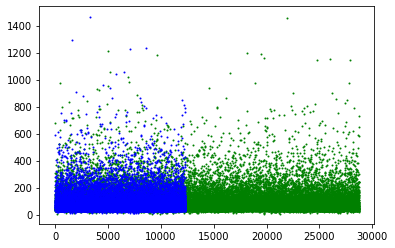

In [116]:
#NO
#plt.scatter(range(0,len(counter_text)),counter_text,s=1,c='red')
plt.scatter(range(0,len(counter_clean)),counter_clean,s=1,c='green')
plt.scatter(range(0,len(counter_clean_eva)),counter_clean_eva,s=1,c='blue')

(array([1.0066e+04, 1.7890e+03, 3.0000e+02, 1.0500e+02, 3.6000e+01,
        1.8000e+01, 3.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([   9. ,  154.6,  300.2,  445.8,  591.4,  737. ,  882.6, 1028.2,
        1173.8, 1319.4, 1465. ]),
 <a list of 10 Patch objects>)

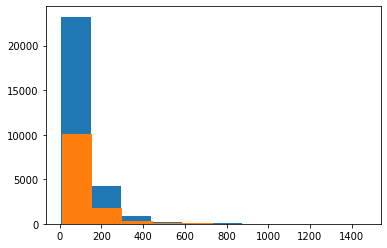

In [117]:
plt.hist(counter_clean)
plt.hist(counter_clean_eva)

(array([2.3156e+04, 4.3430e+03, 8.5400e+02, 2.3700e+02, 1.0000e+02,
        3.9000e+01, 1.3000e+01, 6.0000e+00, 5.0000e+00, 1.0000e+00]),
 array([   5. ,  159.1,  313.2,  467.3,  621.4,  775.5,  929.6, 1083.7,
        1237.8, 1391.9, 1546. ]),
 <a list of 10 Patch objects>)

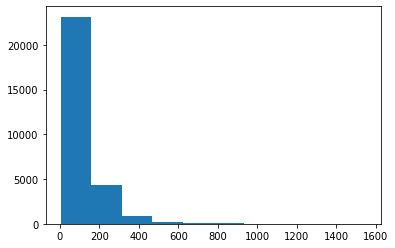

In [7]:
#NO
plt.hist(counter)

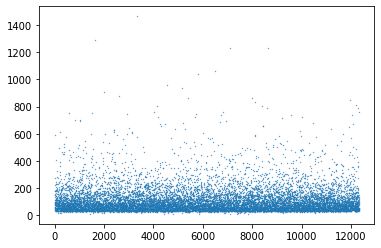

In [28]:
#NO
plt.scatter(range(0,len(counter_pre)),counter_pre,s=.1)

(array([1.0066e+04, 1.7890e+03, 3.0000e+02, 1.0500e+02, 3.6000e+01,
        1.8000e+01, 3.0000e+00, 2.0000e+00, 3.0000e+00, 1.0000e+00]),
 array([   9. ,  154.6,  300.2,  445.8,  591.4,  737. ,  882.6, 1028.2,
        1173.8, 1319.4, 1465. ]),
 <a list of 10 Patch objects>)

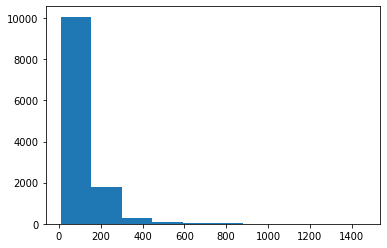

In [29]:
#NO
plt.hist(counter_pre)

In [10]:
#NO
print(len(words))
#words
#for k,v in words.items():
#    if(len(k)==22):
#        print(f"{k} {v}")

print(len(words_pre))
#words_pre
#for k,v in words_pre.items():
#    if(len(k)==1):
# 

p = 0
n = 0
for i in (sentences):
    if i[1] == 1:
        p  = p + 1
    else:
        n = n + 1
print(f'Positive {p} Negative {n}')

153276


In [95]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.corpus import stopwords as sw
from sklearn.feature_extraction .text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
stop_words = sw.words('italian')+['hotel','stanza','ristorante','soggiornato','terrazza','visita','quali','trova','taxi','piscina','quando','opzione','vario','servizio','pranzo','vedute','utilizzato','viene','settimana','presto','pasta','stesso','venezia','torino','milano','turistico','selezione','staff','mattino','presto','iniziare','me','senso','zona','tipo','spazi','varia','valigie','vini','vado','etc','stanchi','cereali','pernottato','zone','vedi','ross']

max_feature = 2000 #len(dev['clean'])

def X_tfidf(sentences,max_feature = max_feature):  
    
    #Create a vocabulary of words
    #cv = CountVectorizer(min_df = 50, max_df=.8,stop_words=stop_words,max_features=max_f)
    #word_count_vector = cv.fit_transform(sentences)
    
    #tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
    #X = tfidf_transformer.fit_transform(word_count_vector).toarray()
    
    #This gives problem with 'lower' to make words lower case
    tfidf = TfidfVectorizer(min_df=2, max_df=0.8, ngram_range=(1,2),lowercase=False)
    X = tfidf.fit_transform(sentences)
    return X, tfidf

In [96]:
X, cv = X_tfidf(dev.iloc[:,2])
Y = cv.transform(eva.iloc[:,1])
#Y, _ = X_tfidf(eva.iloc[:,1])

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,dev.iloc[:,1],test_size=0.2,random_state=0)

In [184]:
#NO
print(len(cv.vocabulary_.keys()))
for i in list(cv.vocabulary_.keys())[:10]:
    print(f'{i} -> {words_pre[i]}')

2000


NameError: name 'words_pre' is not defined

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
def train_model(classifier, X_train, X_test, y_train, y_test, printAll=True):
    # fit the training dataset on the classifier
    classifier.fit(X_train, y_train)
    
    # predict the labels on validation dataset
    y_pred = classifier.predict(X_test)
    
    if(printAll):
        print(confusion_matrix(y_test,y_pred))
        print(classification_report(y_test,y_pred))
        print(f"Accurancy: {accuracy_score(y_test, y_pred)}")
        print(f"f1 Score: {f1_score(y_test, y_pred, average='weighted')}")
        print("--- --- --- --- ---")
    

In [98]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
# Naive Bayes on Word Level TF IDF Vectors
mNB = MultinomialNB()
train_model(mNB, X_train, X_test, y_train, y_test)
y_eval = mNB.predict(Y)
#Accurancy: 0.9090592940358199
#f1 Score: 0.9081632053892882

#Accurancy: 0.9382716049382716
#f1 Score: 0.9372915830136257

[[1425  458]
 [  23 3845]]
              precision    recall  f1-score   support

         neg       0.98      0.76      0.86      1883
         pos       0.89      0.99      0.94      3868

    accuracy                           0.92      5751
   macro avg       0.94      0.88      0.90      5751
weighted avg       0.92      0.92      0.91      5751

Accurancy: 0.9163623717614328
f1 Score: 0.9131275043222804
--- --- --- --- ---


In [87]:
from sklearn.naive_bayes import GaussianNB
# Naive Bayes on Word Level TF IDF Vectors
gNB = GaussianNB()
train_model(gNB, X_train, X_test, y_train, y_test)
y_eval = gNB.predict(Y)
#Accurancy: 0.9090592940358199
#f1 Score: 0.9081632053892882

#Accurancy: 0.9382716049382716
#f1 Score: 0.9372915830136257

MemoryError: 

In [99]:
from sklearn.ensemble import RandomForestClassifier

#best is 14 and it does not improve after that anymore [5,20]:
# no data shuffle: accurancy=0.901 
# data shuffle: accurancy=0.902

#for i in range(5,20):
classifier = RandomForestClassifier(n_estimators=20, random_state=0)
train_model(classifier, X_train, X_test, y_train, y_test)
y_eval = classifier.predict(Y)

[[1424  459]
 [ 135 3733]]
              precision    recall  f1-score   support

         neg       0.91      0.76      0.83      1883
         pos       0.89      0.97      0.93      3868

    accuracy                           0.90      5751
   macro avg       0.90      0.86      0.88      5751
weighted avg       0.90      0.90      0.89      5751

Accurancy: 0.8967136150234741
f1 Score: 0.8939283526470535
--- --- --- --- ---


In [100]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
train_model(sgd, X_train, X_test, y_train, y_test)
y_eval = sgd.predict(Y)

[[1741  142]
 [  98 3770]]
              precision    recall  f1-score   support

         neg       0.95      0.92      0.94      1883
         pos       0.96      0.97      0.97      3868

    accuracy                           0.96      5751
   macro avg       0.96      0.95      0.95      5751
weighted avg       0.96      0.96      0.96      5751

Accurancy: 0.9582681272822118
f1 Score: 0.9581394663683391
--- --- --- --- ---


In [93]:
def WriteOnFile(name):
    f = open(name,"w")
    f.write("Id,Predicted\n")
    for index,i in enumerate(y_eval):
        f.write(f"{index},{i}\n")
    f.close

In [94]:
WriteOnFile("out5 sgd ngram(1,2).csv")

In [92]:
for i in range(0,40):
    if y_eval[i] != 'pos':
        print(f"{i} {y_eval[i]}")

1 neg
3 neg
5 neg
7 neg
10 neg
11 neg
12 neg
13 neg
14 neg
16 neg
17 neg
20 neg
21 neg
23 neg
26 neg
28 neg
34 neg


In [179]:
words.vocabulary_

AttributeError: vocabulary_ not found

In [186]:
cv.vocabulary_.sort()

AttributeError: 'dict' object has no attribute 'sort'

In [192]:
for i in sorted(cv.vocabulary_.items(), key = lambda kv:(kv[1], kv[0])):
    print(i)

('abbastanza', 0)
('abbondante', 1)
('abbondanti', 2)
('abbondanza', 3)
('ac', 4)
('accaduto', 5)
('accanto', 6)
('accappatoi', 7)
('accappatoio', 8)
('accedere', 9)
('accessibile', 10)
('accesso', 11)
('accettabile', 12)
('accogliente', 13)
('accoglienti', 14)
('accoglienza', 15)
('accolti', 16)
('accolto', 17)
('accomodante', 18)
('accompagnato', 19)
('acqua', 20)
('acquistare', 21)
('acquistato', 22)
('adatta', 23)
('adatto', 24)
('addetti', 25)
('addetto', 26)
('addirittura', 27)
('adeguata', 28)
('adeguato', 29)
('adiacente', 30)
('adulti', 31)
('aeroporto', 32)
('affaccia', 33)
('affacciano', 34)
('affacciava', 35)
('affare', 36)
('affari', 37)
('affascinante', 38)
('affatto', 39)
('affettati', 40)
('affollata', 41)
('aggiornamento', 42)
('aggiungere', 43)
('aggiunto', 44)
('agio', 45)
('agosto', 46)
('ah', 47)
('aires', 48)
('aiutare', 49)
('aiutato', 50)
('aiuto', 51)
('alberghi', 52)
('albergo', 53)
('alcun', 54)
('alcuna', 55)
('alcune', 56)
('alcuni', 57)
('alloggiare', 58)


('scoprire', 1554)
('scorsa', 1555)
('scorso', 1556)
('scortese', 1557)
('scritto', 1558)
('scrivania', 1559)
('scrivere', 1560)
('scusa', 1561)
('scuse', 1562)
('sdraio', 1563)
('sebbene', 1564)
('seconda', 1565)
('secondi', 1566)
('secondo', 1567)
('sedere', 1568)
('sedersi', 1569)
('sedia', 1570)
('sedie', 1571)
('seduti', 1572)
('segnalare', 1573)
('seguente', 1574)
('seguito', 1575)
('selezione', 1576)
('self', 1577)
('sembra', 1578)
('sembrano', 1579)
('sembrato', 1580)
('sembrava', 1581)
('sembravano', 1582)
('semplice', 1583)
('semplicemente', 1584)
('semplici', 1585)
('sempre', 1586)
('sensazione', 1587)
('senso', 1588)
('sente', 1589)
('sentire', 1590)
('sentiti', 1591)
('sentito', 1592)
('sentiva', 1593)
('sento', 1594)
('senz', 1595)
('senza', 1596)
('sera', 1597)
('serale', 1598)
('serata', 1599)
('serie', 1600)
('serve', 1601)
('service', 1602)
('servita', 1603)
('serviti', 1604)
('servito', 1605)
('servizi', 1606)
('servizio', 1607)
('set', 1608)
('settembre', 1609)
('se

In [177]:
cv.vocabulary_

{'lussuoso': 930,
 'mai': 942,
 'esperienza': 621,
 'prima': 1358,
 'classe': 349,
 'direttamente': 530,
 'accoglienza': 16,
 'reception': 1451,
 'cordiale': 435,
 'efficiente': 597,
 'bar': 191,
 'avviso': 180,
 'eccezionale': 588,
 'piccolo': 1267,
 'camere': 268,
 'molti': 1038,
 'ogni': 1120,
 'anno': 101,
 'parla': 1185,
 'sè': 1768,
 'tutte': 1876,
 'gestito': 755,
 'sotto': 1692,
 'occhio': 1108,
 'grande': 785,
 'cima': 341,
 'fuori': 737,
 'porto': 1299,
 'principale': 1362,
 'ischia': 864,
 'facile': 645,
 'raggiungere': 1436,
 'piedi': 1268,
 'verso': 1939,
 'basso': 195,
 'torna': 1817,
 'collina': 363,
 'autobus': 175,
 'caro': 293,
 'fiera': 684,
 'fisso': 699,
 'minuti': 1024,
 'macchina': 934,
 'cerca': 312,
 'giardini': 757,
 'piuttosto': 1276,
 'strada': 1741,
 'due': 581,
 'piscine': 1274,
 'inferiore': 834,
 'piccola': 1263,
 'acqua': 21,
 'calda': 259,
 'set': 1624,
 'ben': 210,
 'curati': 468,
 'affaccia': 34,
 'baia': 186,
 'credo': 460,
 'cosa': 447,
 'niente': 

In [49]:
a = eva.iloc[:,1]

In [50]:
for i in range(20,40):
    print(i)
    print(a[i])
    print("--- --- ---")

20
 hotel ti accoglie con una hall sontuosa  degli ambienti non particolarmente raffinati ma comunque confortevoli in particolar modo la sala lettura che ho trovato molto bella nella stagione primaverile si può godere dei tavolini esterni dominati da una fontana per gusti forti la nota dolente arriva all ingresso nella stanza lo spazio è estremamente ridotto specie se la doppia è occupata da due persone anche se si spegne il climatizzatore avrete la notte rovinata da un fastidiosissimo rumore di ventola gli scuri alle finestre non si chiudono completamente  la luce comincerà  penetrare nella stanza dalle prime ore del mattino per me le il miscelatore della doccia era guasto  ho dovuto scegliere tra ustionante  congelante dulcis in fundo alle del mattino qualcuno ha resenttato le luci che si sono accese tutte di colpo per poi spegnersi un secondo dopo tutto questo in un stelle lusso esperienza pessima 
--- --- ---
21
siamo arrivati dopo ore su un volo dall australia una notte  roma poi 

In [178]:
cv

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.8, max_features=2000, min_df=50,
                ngram_range=(1, 1), preprocessor=None,
                stop_words=['ad', 'al', 'allo', 'ai', 'agli', 'all', 'agl',
                            'alla', 'alle', 'con', 'col', 'coi', 'da', 'dal',
                            'dallo', 'dai', 'dagli', 'dall', 'dagl', 'dalla',
                            'dalle', 'di', 'del', 'dello', 'dei', 'degli',
                            'dell', 'degl', 'della', 'delle', ...],
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [192]:
b = list(ngrams([1,2,3,4],2))

In [193]:
b

[(1, 2), (2, 3), (3, 4)]